#### Importing all the relevant libraries ####

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy.optimize import minimize 
from scipy.stats import norm
import math

import matplotlib.pyplot as plt
from scipy import stats 
from scipy.stats import lognorm

### Reading the data ###

In [2]:
file= r"D:\2_Semester_2_2022_MSHCA_Niyatha\1_Mini2\Advance Business Analytics\homework1\HW1_data-1.xlsx"
data = pd.read_excel(file)

In [3]:
data.head()

,Gender,Rank,Years on the current rank,Degree,Years on the job,salary
0,male,full,25,doctorate,35,36350
1,male,full,13,doctorate,22,35350
2,male,full,10,doctorate,23,28200
3,female,full,7,doctorate,27,26775
4,male,full,19,masters,30,33696


In [4]:
# encoding rank with 3,2 and 1
data['Rank'] = np.where(data['Rank']=="full",3,
                       np.where(data['Rank']=="associate",2,1))

In [5]:
#encode the data
data_encoded=pd.get_dummies(data=data,drop_first=True)
data_encoded.head()

,Rank,Years on the current rank,Years on the job,salary,Gender_male,Degree_masters
0,3,25,35,36350,1,0
1,3,13,22,35350,1,0
2,3,10,23,28200,1,0
3,3,7,27,26775,0,0
4,3,19,30,33696,1,1


In [6]:
data_encoded['Rank'].value_counts()

3    20
1    18
2    14
Name: Rank, dtype: int64

In [7]:
data.isnull().sum()

Gender                       0
Rank                         0
Years on the current rank    0
Degree                       0
Years on the job             0
salary                       0
dtype: int64

In [8]:
data.value_counts()

Gender  Rank  Years on the current rank  Degree     Years on the job  salary
female  1     0                          doctorate  2                 20300     1
              1                          doctorate  1                 15000     1
male    2     8                          masters    31                20525     1
              9                          doctorate  12                24832     1
                                         masters    27                23712     1
              10                         masters    15                22906     1
              11                         doctorate  14                24800     1
                                         masters    14                24742     1
                                                    31                23300     1
              15                         doctorate  19                24750     1
        3     5                          doctorate  18                25400     1
              6      

### Que 2 

#### Can you provide some arguments on what and how will you test if there is discrimination?

<li> Re-iterating, Problem statment would be to determine the factors that are associated with discrimation in a small college setting.
<li> So the dependent variable here is salary, and we will check for any relationships between the other independent variables like gender, rank, years, degree, years on job and salary.
<li> In brief, we are trying to understand if the salary paid to professors has any association with gender, rank, years on the job, degree, years on the current rank and salary. 

 


<dt> Steps <dt>
<li> Plot graph, scatter plot and for any relationship between dependent variable and independent variables.
<li> Check if there is correlation between the independent variables.
<li> Check if there is correlation between the dependent variables.
<li> Run  OLS, and interpret the betas and check if these values are significant  

##### Scatter Plots #####

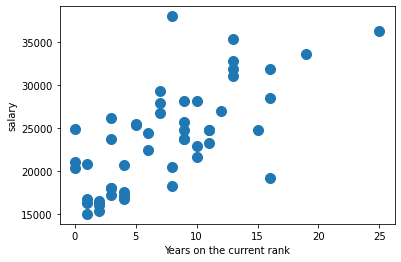

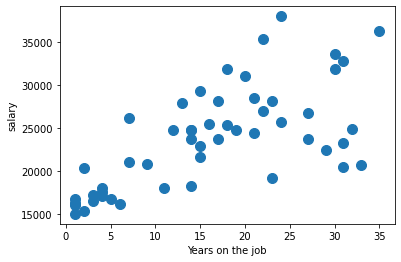

In [9]:
for i in data[["Years on the current rank","Years on the job"]]:
    data.plot.scatter(x = i, y = 'salary', s = 100)

Interpretation : From these plots we can see that both the years on the job and years on the current rank have a positive correlation towards salary.
However we cannot judge if these play a significant role or have any impact on our dependent variable. Let's look at the pearson correlation to measure the strength of the linear relationship between two variables.

In [10]:
data.columns

Index(['Gender', 'Rank', 'Years on the current rank', 'Degree',
       'Years on the job', 'salary'],
      dtype='object')

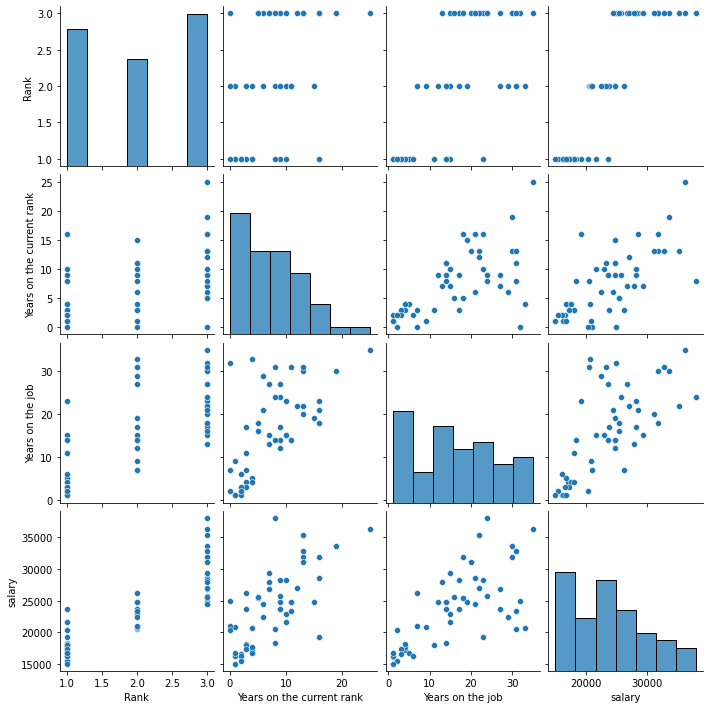

In [11]:
## using pairplots to look at the relationships of the independent and dependent variables
import seaborn as sns
sns.pairplot(data)

##### Correlations #####

In [12]:
corr = data.corr()

In [13]:
corr

,Rank,Years on the current rank,Years on the job,salary
Rank,1.000000,0.507980,0.695724,0.867488
Years on the current rank,0.507980,1.000000,0.638776,0.700669
Years on the job,0.695724,0.638776,1.000000,0.674854
salary,0.867488,0.700669,0.674854,1.000000


<AxesSubplot:>

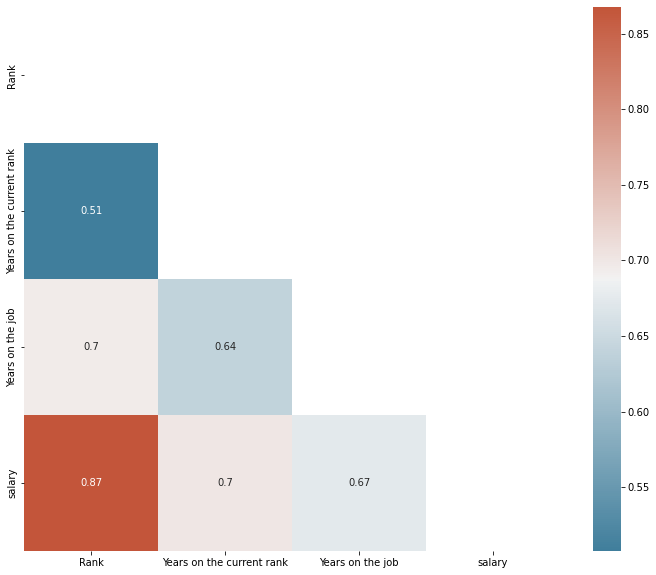

In [14]:
# Set up the matplotlib plot configuration
#
f, ax = plt.subplots(figsize=(12, 10))
#
# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(corr, dtype=bool))
#
# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
#
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

Interpretation : We can see that most of these variables have positive correlation of greater than 0.6. Lets further run an OLS to check if the variables are significant 

### Write down the model you will test. Estimate the parameters and suggest whether you find any evidence of discrimination ###

##### Running OLS #####

In [15]:
##Define intercept by a constant
data_encoded['Intercept']=1
#Run OLS using the OLS commang from statsmodels.api library
#log sale
results =sm.OLS(data_encoded.salary,data_encoded[["Intercept",'Gender_male', 'Rank', 'Years on the current rank', 'Degree_masters',
       'Years on the job']]).fit()

In [16]:
data_encoded.head()

,Rank,Years on the current rank,Years on the job,salary,Gender_male,Degree_masters,Intercept
0,3,25,35,36350,1,0,1
1,3,13,22,35350,1,0,1
2,3,10,23,28200,1,0,1
3,3,7,27,26775,0,0,1
4,3,19,30,33696,1,1,1


In [17]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     54.13
Date:                Wed, 30 Mar 2022   Prob (F-statistic):           3.86e-18
Time:                        23:27:49   Log-Likelihood:                -474.78
No. Observations:                  52   AIC:                             961.6
Df Residuals:                      46   BIC:                             973.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                  1.132e+04    966.807     11.709      0.000    9374.213    1.33e+04
Gender_male               -1241.7925    885.560     -1.402      0.168   -3024.332     540.747
Rank                       5586.1814    663.967      8.413      0.000    4249.685    6922.678
Years on the current rank   482.8598     91.718      5.265      0.000     298.242     667.478
Degree_masters             1331.6441    992.854      1.341      0.186    -666.868    3330.156
Years on the job           -128.7906     75.582     -1.704      0.095    -280.928      23.347
==============================================================================
Omnibus:                       26.336   Durbin-Watson:                   1.748
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.754
Skew:                           1.482   Prob(JB):                     1.29e-12
Kurtosis:                       7.060   Cond. No.                         77.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Interpretation ###



<li> Parameters
<li>Betas for gender_male, rank, years on the current rank, degree_masters, years on the job are -1241.79, 5586.1814, 482.85, 1331.6441 and -128.79 respectively.
The alpha ( constant/intercept is 11320). 
SE's for gender_male, rank, years on the current rank, degree_masters, years on the job are 885.56, 663.96, 91.7, 992.85 and 75.582 respectively. 
However not all of these are significant, only rank, years on the current rank are significant, since their p value < 0.05. ( note we are assuming a confidence interval of 95%) 

 

<dt> This means that <dt>
<li> On average, controlling for all factors, a unit increase in rank is associated with a 5586.18 dollars increase in salary.
<li> On average, controlling for all factors, a one year increase in the current rank is associated with $482.85 increase in salary.

#### Is there any evidence of discrimation ? ####
With respect to gender we do not see any discrimation, however we do see an increase in salary associated with rank and years on the given rank. This is not a case of discrimation, these variables can be well explained since higher the rank, higher the salary in general. The same applies to years on the rank.

In [18]:
## Que 3

3a)Why would you prefer linear regression over other methods (like likelihood functions). (3)
We prefer linear regression over other methods mainly because of its simplicity and explainabilty. The more complex
a model gets, the harder it is to explain the model to business stakeholders. 
Also linear regression can be used in many ways by tweaking the independent variables and applying squares, or cubes. 
Following this we can apply log on both sides of the equation and apply OLS to get our results. 


3b) What is the benefit of using likelihood functions and distribution to estimate parameters? What are some shortcomings?
Likelihood functions are very useful to model non-linear data, meaning in case of a linear regeression we assume that the
dependent variable is normally distributed, and that the independent variables are linearly related to dependent variable.
But in reality this might not be the case. 
Likelihood functions are a superset of other methods like linear regression, logistic regression etc. 
So applying likelihood functions and using MLE to estimate parameters will give us much better results in most cases. 